In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,cross_val_score,KFold
import matplotlib.pyplot as plt
import os 
from sklearn.metrics import roc_curve, auc

chose_data = 'full_data.csv'
#chose_data = 'significant_data_05.csv'


In [2]:
data = pd.read_csv(chose_data)
total_data =  len(data.index)
print('the number of sample:',total_data)
#adata = data.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'Sales', 'Late_delivery_risk'], axis = 1)
data = data.drop([ 'Unnamed: 0','market_int','time_delta'], axis = 1)
data.keys()

the number of sample: 180519


Index(['Benefit per order', 'Latitude', 'Longitude', 'Order Item Discount',
       'Category Id', 'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Product Category Id',
       'Late_delivery_risk', 'order_weekday', 'shipping_weekday',
       'shipping_mode_int', 'type', 'Sales per customerlog'],
      dtype='object')

In [3]:
x_train,x_test,y_train,y_test = train_test_split(data.drop(['Late_delivery_risk'], axis = 1).values,data['Late_delivery_risk'].values,test_size = 0.3)

RandomFores

In [4]:

#from sklearn import preprocessing

#x_train  = preprocessing.normalize(x_train)
#x_test  = preprocessing.normalize(x_test)

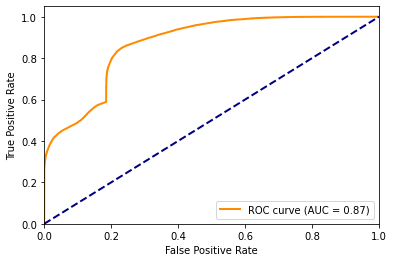

In [5]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.01, n_estimators=100,
                       verbose=0, warm_start=True)
model = rf.fit(x_train, y_train)
# Train a Random Forest classifier
#model = RandomForestClassifier()
#model.fit(x_train, y_train)

# Predict probabilities for the test set
y_prob = model.predict_proba(x_test)[:, 1]

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

mức độ quan trọng của feature: [1.30399631e-03 3.38055785e-03 2.55898472e-03 1.48587809e-03
 4.79005434e-04 9.35563959e-04 6.07475394e-04 1.15355455e-03
 2.66432281e-04 8.00567526e-04 1.27091957e-03 1.45995078e-03
 5.53762134e-04 8.70682306e-02 5.25057723e-02 8.16844525e-01
 2.61189617e-02 1.20586214e-03]
feature quan trọng nhất: shipping_mode_int
[15 13 14 16  1  2  3 11  0 10 17  7  5  9  6 12  4  8]


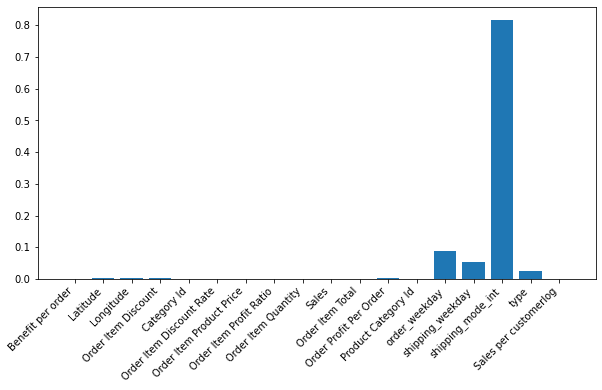

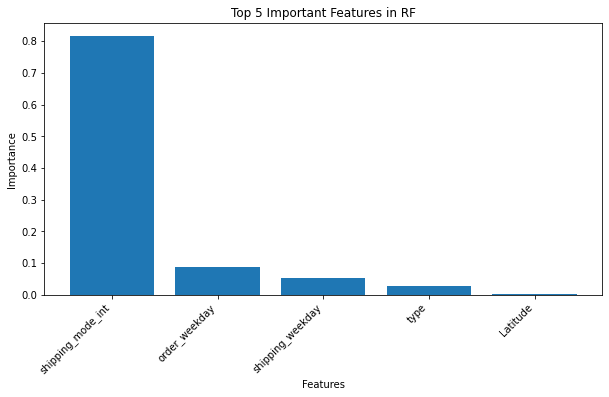

In [6]:
# biểu thị mức độ quan trọng của feature, cao nhất ứng vs quan trọng nhất 
plt.figure(figsize=(10,5))
print('mức độ quan trọng của feature:', rf.feature_importances_)
plt.bar(list(data.drop(['Late_delivery_risk'], axis = 1).keys()),rf.feature_importances_)
# Xoay trục x
plt.xticks(rotation=45, ha='right')
print('feature quan trọng nhất:', list(data.drop(['Late_delivery_risk'], axis = 1).keys())[np.argmax(rf.feature_importances_)])

import numpy as np
import matplotlib.pyplot as plt

# Đoạn code tính toán mức độ quan trọng của features và vẽ biểu đồ
feature_importances = rf.feature_importances_
feature_names = list(data.drop(['Late_delivery_risk'], axis=1).keys())
sorted_indices = np.argsort(feature_importances)[::-1]
print(sorted_indices)
top_feature_indices = sorted_indices[:5]
top_feature_names = [feature_names[i] for i in top_feature_indices]
top_feature_importances = feature_importances[top_feature_indices]

plt.figure(figsize=(10, 5))
plt.bar(top_feature_names, top_feature_importances)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 Important Features in RF')
plt.savefig('top_5_important_features_RF_full_data.png')
plt.show()


In [7]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[19903  4525]
 [12085 17643]]
              precision    recall  f1-score   support

           0       0.62      0.81      0.71     24428
           1       0.80      0.59      0.68     29728

    accuracy                           0.69     54156
   macro avg       0.71      0.70      0.69     54156
weighted avg       0.72      0.69      0.69     54156

0.7041213211233188


<Figure size 432x288 with 0 Axes>

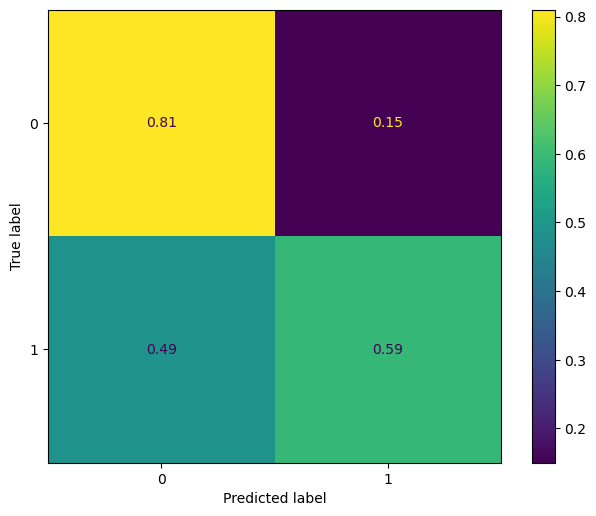

In [8]:
import numpy as np
#cm = np.asarray(cm)
cm = cm/cm.sum(axis=1)
for i in range(len(cm)):
    for j in range(len(cm)):
        cm[i][j] = round(cm[i][j],2)
        
plt.figure()
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=model.classes_)

# set the plot title using the axes object
#ax.set(title='Confusion Matrix for the Diabetes Detection Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax)
fig.savefig('confusion_matrix_RF_main.png')


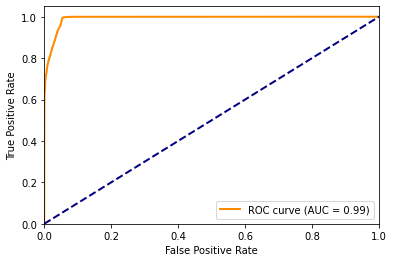

In [9]:
xgb = XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints=None,
              n_estimators=140, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=27, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)
model = xgb.fit(x_train,y_train)
# Predict probabilities for the test set
y_prob = model.predict_proba(x_test)[:, 1]

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [10]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[23119  1309]
 [  220 29508]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     24428
           1       0.96      0.99      0.97     29728

    accuracy                           0.97     54156
   macro avg       0.97      0.97      0.97     54156
weighted avg       0.97      0.97      0.97     54156

0.9695067603165154


<Figure size 432x288 with 0 Axes>

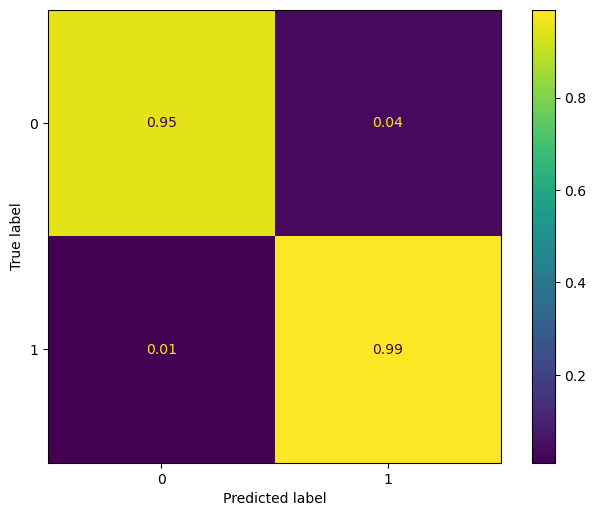

In [11]:
import numpy as np
#cm = np.asarray(cm)
cm = cm/cm.sum(axis=1)
for i in range(len(cm)):
    for j in range(len(cm)):
        cm[i][j] = round(cm[i][j],2)
        
plt.figure()
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=model.classes_)

# set the plot title using the axes object
#ax.set(title='Confusion Matrix for the Diabetes Detection Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax)
fig.savefig('confusion_matrix_XGB_main.png')


mức độ quan trọng của feature: [0.00370877 0.00609767 0.00575894 0.00357581 0.00358402 0.00340337
 0.00386448 0.00396622 0.00379008 0.00361292 0.00358604 0.00491013
 0.00276737 0.25395456 0.2608747  0.3790849  0.04757907 0.00588097]
feature quan trọng nhất: shipping_mode_int
[15 14 13 16  1 17  2 11  7  6  8  0  9 10  4  3  5 12]


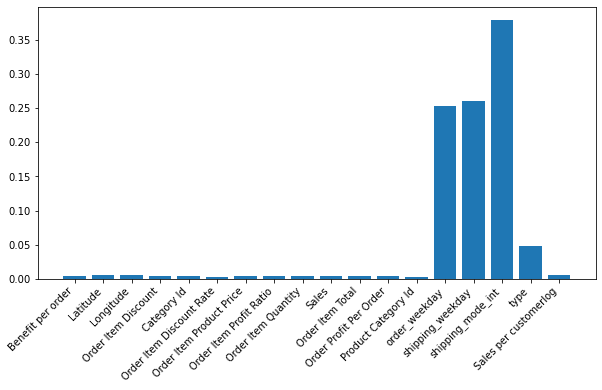

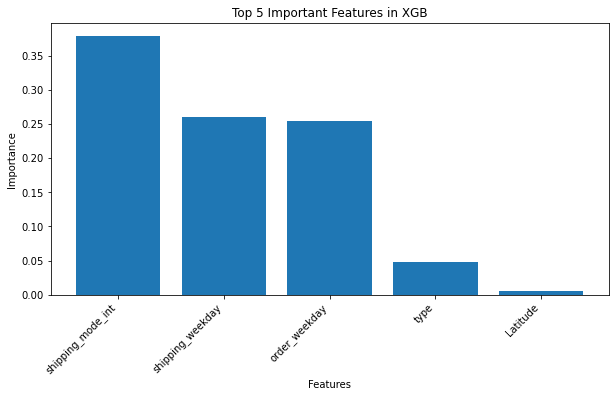

In [12]:
# biểu thị mức độ quan trọng của feature, cao nhất ứng vs quan trọng nhất 
plt.figure(figsize=(10,5))
print('mức độ quan trọng của feature:', xgb.feature_importances_)
plt.bar(list(data.drop(['Late_delivery_risk'], axis = 1).keys()),xgb.feature_importances_)
# Xoay trục x
plt.xticks(rotation=45, ha='right')
print('feature quan trọng nhất:', list(data.drop(['Late_delivery_risk'], axis = 1).keys())[np.argmax(xgb.feature_importances_)])

import numpy as np
import matplotlib.pyplot as plt

# Đoạn code tính toán mức độ quan trọng của features và vẽ biểu đồ
feature_importances = xgb.feature_importances_
feature_names = list(data.drop(['Late_delivery_risk'], axis=1).keys())
sorted_indices = np.argsort(feature_importances)[::-1]
print(sorted_indices)
top_feature_indices = sorted_indices[:5]
top_feature_names = [feature_names[i] for i in top_feature_indices]
top_feature_importances = feature_importances[top_feature_indices]

plt.figure(figsize=(10, 5))
plt.bar(top_feature_names, top_feature_importances)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 Important Features in XGB')
plt.savefig('top_5_important_features_xgb_full_data.png')
plt.show()


*logistic regression


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#lg = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
x_train,x_test,y_train,y_test = train_test_split(data.drop(['Late_delivery_risk'], axis = 1).values,data['Late_delivery_risk'].values,test_size = 0.3)
# Create a Logistic Regression classifier
clf = LogisticRegression(penalty='l1', solver='liblinear')

# Train the classifier
clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(x_test)


# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.6885294334884408
              precision    recall  f1-score   support

           0       0.62      0.82      0.70     24347
           1       0.80      0.58      0.67     29809

    accuracy                           0.69     54156
   macro avg       0.71      0.70      0.69     54156
weighted avg       0.72      0.69      0.69     54156



<AxesSubplot:title={'center':'Feature Importance'}>

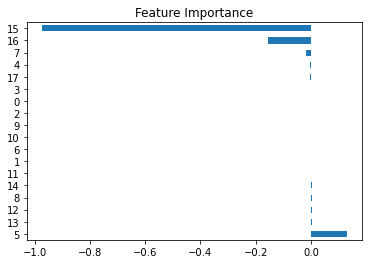

In [14]:
# biểu thị mức độ quan trọng của feature, cao nhất ứng vs quan trọng nhất 

importance = clf.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

*SVM

In [15]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model = clf.fit(x_train, y_train)
#clf.predict(X[:2, :])

#clf.predict_proba(X[:2, :])

y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
model.score(x_test, y_test)


[[19012  5335]
 [ 1485 28324]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85     24347
           1       0.84      0.95      0.89     29809

    accuracy                           0.87     54156
   macro avg       0.88      0.87      0.87     54156
weighted avg       0.88      0.87      0.87     54156

0.8655296623563112


0.8740675086786321

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85     24347
           1       0.84      0.95      0.89     29809

    accuracy                           0.87     54156
   macro avg       0.88      0.87      0.87     54156
weighted avg       0.88      0.87      0.87     54156



KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=30)  # Specify the number of neighbors (K)

# Train the classifier
knn.fit(x_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(x_test)

from sklearn.metrics import accuracy_score
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5302644213014255


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.40      0.44     24347
           1       0.57      0.63      0.60     29809

    accuracy                           0.53     54156
   macro avg       0.52      0.52      0.52     54156
weighted avg       0.52      0.53      0.52     54156



Linear Discriminant Analysis (LDA)

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your data in X (features) and y (labels)
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an LDA classifier object
lda = LinearDiscriminantAnalysis()

# Fit the LDA model on the training data
lda.fit(x_train, y_train)

# Make predictions on the test set
y_pred = lda.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
#model.score(x_train, y_train)

Accuracy: 0.6885294334884408
[[19012  5335]
 [ 1485 28324]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85     24347
           1       0.84      0.95      0.89     29809

    accuracy                           0.87     54156
   macro avg       0.88      0.87      0.87     54156
weighted avg       0.88      0.87      0.87     54156

0.8655296623563112
